In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#renaming columns v1 and v2 
df.rename(columns= {'v1': 'class label', 'v2':'message'}, inplace = True)

In [5]:
#dropping columns Unnamed:2, Unnamed:3 and Unnamed:4
df.drop (['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [6]:
df.head()

,class label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df['class label'].value_counts()

ham     4825
spam     747
Name: class label, dtype: int64

C:\Users\DELL\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class label', ylabel='count'>

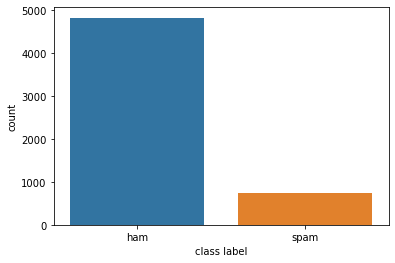

In [9]:
sns.countplot(df['class label'])

In [10]:
df_spam = df[df['class label'] == 'spam']
df_ham = df [df['class label']== 'ham']

In [11]:
#converting ham and spam messages into two lists
ham_list = df_spam['message'].tolist()
spam_list = df_spam['message'].tolist()

In [12]:
#converting the list into a string of spam and ham 
filtered_spam = ("").join(spam_list)

filtered_ham = ("").join(ham_list)


In [13]:
import os 
from wordcloud import WordCloud 
from PIL import Image 
comment_mask = np.array(Image.open('comment.png'))

In [14]:
#create and generate a word cloud 
wordcloud = WordCloud (max_font_size = 160, margin = 0, mask = comment_mask, background_color = "white", colormap = "Reds").generate(filtered_spam)

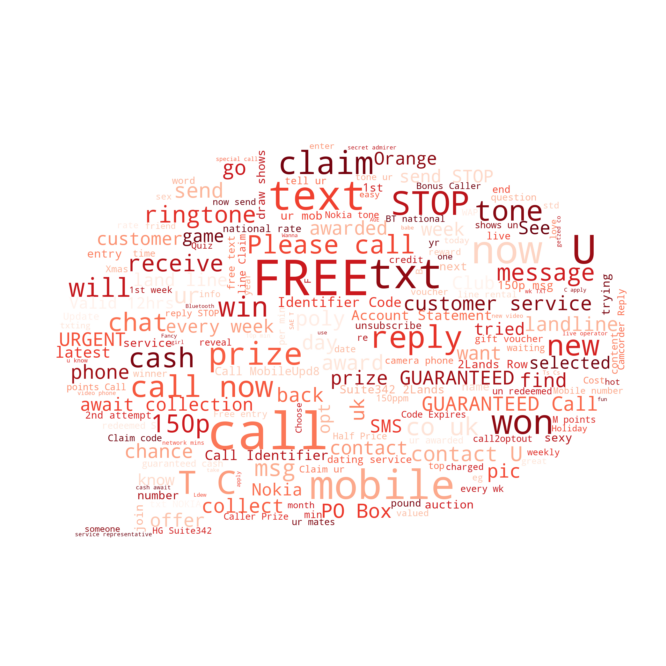

In [15]:
plt.figure(figsize = (12, 12))
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.margins(x=0, y =0)
plt.show()

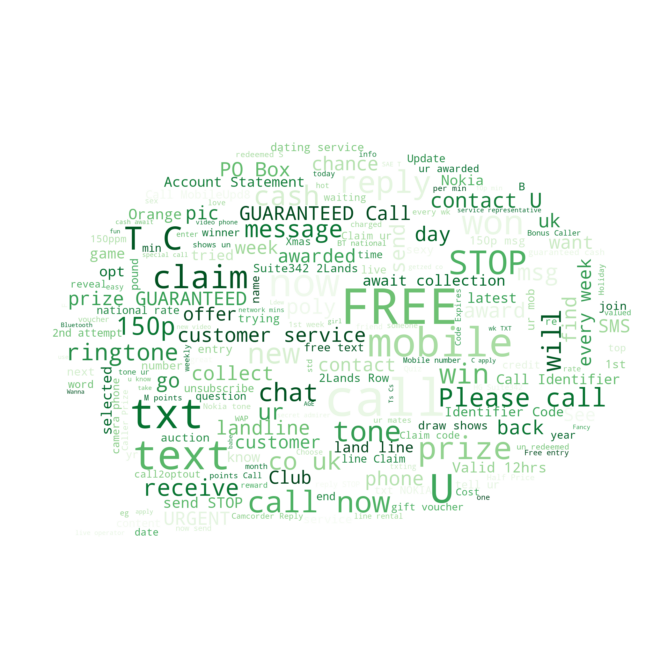

In [16]:
#create and display a word cloud 
wordcloud = WordCloud (max_font_size = 160, margin = 0, mask = comment_mask, background_color = "white", colormap = "Greens").generate(filtered_ham)

plt.figure(figsize = (12, 12))
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.margins(x=0, y =0)
plt.show()


In [17]:
df['class label'] = df['class label'].apply (lambda x:1 if x == 'spam' else 0)

In [18]:
df.head()

,class label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split (df['message'], df['class label'], test_size = 0.25, random_state = 0)

In [20]:
X_train.shape

(4179,)

In [21]:
print(X_test.shape)

(1393,)


### tfidf Vectorizer Cell

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer 

list = X_train.tolist()
vectorizer = TfidfVectorizer (
    input = list, 
    lowercase = True, 
    stop_words = 'english'
)

feature_train_transformed = vectorizer.fit_transform(list)
feature_test_transformed = vectorizer.transform(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(feature_train_transformed, Y_train)


MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [25]:
Y_pred = classifier.predict(feature_test_transformed)

In [26]:
print(classifier.score (feature_test_transformed, Y_test))

0.9662598707824839


In [27]:
actual = Y_test.tolist()
predicted = Y_pred
results = confusion_matrix (actual, predicted)

print("Confusion matrix")
print(results)

print("Accuracy score:", accuracy_score(actual, predicted))

print("Classification report:")
print(classification_report(actual, predicted))


Confusion matrix
[[1196    0]
 [  47  150]]
Accuracy score: 0.9662598707824839
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.76      0.86       197

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



### Count Vectorizer Cell

In [28]:
list = X_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer (strip_accents=ascii) #initialize count vectorizer
word_count_vector = cv.fit_transform(list) #get the document-term matrix
print(word_count_vector.shape)

(4179, 7364)


In [29]:
cv.vocabulary_

{'ll': 3904,
 'text': 6388,
 'you': 7330,
 'when': 7110,
 'drop': 2327,
 'off': 4593,
 'hi': 3219,
 'mate': 4110,
 'its': 3539,
 'rv': 5510,
 'did': 2175,
 'hav': 3154,
 'nice': 4475,
 'hol': 3257,
 'just': 3639,
 'message': 4180,
 'say': 5571,
 'hello': 3194,
 'coz': 1935,
 'haven': 3156,
 'ufffd': 6708,
 'ufffdt': 6763,
 'sent': 5662,
 'in': 3420,
 'ages': 790,
 'started': 6065,
 'driving': 2324,
 'so': 5912,
 'stay': 6076,
 'roads': 5450,
 'rvx': 5511,
 'network': 4457,
 'operator': 4655,
 'the': 6411,
 'service': 5674,
 'is': 3523,
 'free': 2798,
 'for': 2759,
 'visit': 6939,
 '80488': 581,
 'biz': 1278,
 'activate': 730,
 'your': 7335,
 '500': 483,
 'messages': 4182,
 'by': 1485,
 'replying': 5367,
 'to': 6526,
 'this': 6447,
 'with': 7174,
 'word': 7217,
 'terms': 6374,
 'conditions': 1847,
 'www': 7268,
 '07781482378': 29,
 'com': 1793,
 'sexychat': 5689,
 'girls': 2949,
 'are': 963,
 'waiting': 6987,
 'them': 6418,
 'now': 4546,
 'great': 3040,
 'night': 4482,
 'chatting': 1637

In [30]:
X_test_vector = cv.transform(X_test)

In [31]:
#train a classifier 
classifier = MultinomialNB()
classifier.fit(word_count_vector, Y_train)

MultinomialNB()

In [32]:
print("Classifier accuracy {:.2f}%".format(classifier.score(X_test_vector, Y_test) * 100))

Classifier accuracy 98.64%
